In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

C:\Users\shard\AppData\Local\Temp\ipykernel_11476\3936101748.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv("Fake.csv")


In [3]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'
fake.head()
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [4]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape
data.head(5)
data.tail(5)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
44918,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [5]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
# Check the data
data.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,Trump Fans Threaten Jewelers Who Donated Ivan...,Jewelry designers Jill Martinelli and Sabine L...,News,"August 18, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,Kansas Republican wins congressional seat in s...,"KANSAS CITY, Kan (Reuters) - Kansas Republican...",politicsNews,"April 12, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,WHOA! RAPE VICTIM RIPS INTO HILLARY For Enabli...,A woman was asked if she would vote for Hillar...,politics,"Feb 3, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,Obama To Release More GITMO Detainees So They ...,Obama is determined to close GITMO to follow t...,politics,"Dec 18, 2015",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,Breitbart Attacked Jake Tapper And His Hilari...,CNN host Jake Tapper put Breitbart in their pl...,News,"February 17, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Columns: 173 entries, title to target
dtypes: object(173)
memory usage: 59.3+ MB


In [7]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,Trump Fans Threaten Jewelers Who Donated Ivan...,Jewelry designers Jill Martinelli and Sabine L...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,Kansas Republican wins congressional seat in s...,"KANSAS CITY, Kan (Reuters) - Kansas Republican...",politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,WHOA! RAPE VICTIM RIPS INTO HILLARY For Enabli...,A woman was asked if she would vote for Hillar...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,Obama To Release More GITMO Detainees So They ...,Obama is determined to close GITMO to follow t...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,Breitbart Attacked Jake Tapper And His Hilari...,CNN host Jake Tapper put Breitbart in their pl...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [8]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,Jewelry designers Jill Martinelli and Sabine L...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,"KANSAS CITY, Kan (Reuters) - Kansas Republican...",politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,A woman was asked if she would vote for Hillar...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,Obama is determined to close GITMO to follow t...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,CNN host Jake Tapper put Breitbart in their pl...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [9]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,jewelry designers jill martinelli and sabine l...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,"kansas city, kan (reuters) - kansas republican...",politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,a woman was asked if she would vote for hillar...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,obama is determined to close gitmo to follow t...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,cnn host jake tapper put breitbart in their pl...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [10]:
# Remove punctuation

import string

def remove_punct(text):
    allchar=list(text)
    clearstr=""
    for i in allchar:
        if(i not in string.punctuation):
            clearstr+=i
    newstr=''.join(clearstr)
    return newstr
    

data['text'] = data['text'].apply(remove_punct)


In [11]:
# Check
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,jewelry designers jill martinelli and sabine l...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,kansas city kan reuters kansas republican and...,politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,a woman was asked if she would vote for hillar...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,obama is determined to close gitmo to follow t...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,cnn host jake tapper put breitbart in their pl...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [12]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,jewelry designers jill martinelli sabine le gu...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,kansas city kan reuters kansas republican stat...,politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,woman asked would vote hillary clinton intervi...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,obama determined close gitmo follow campaign p...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,cnn host jake tapper put breitbart place frida...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


subject
 Karl Marx is either a villain or a hero of social engineering                                                                                                                                                                                                                                      2
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 and so is Mr. Katzenbach                                                                                     

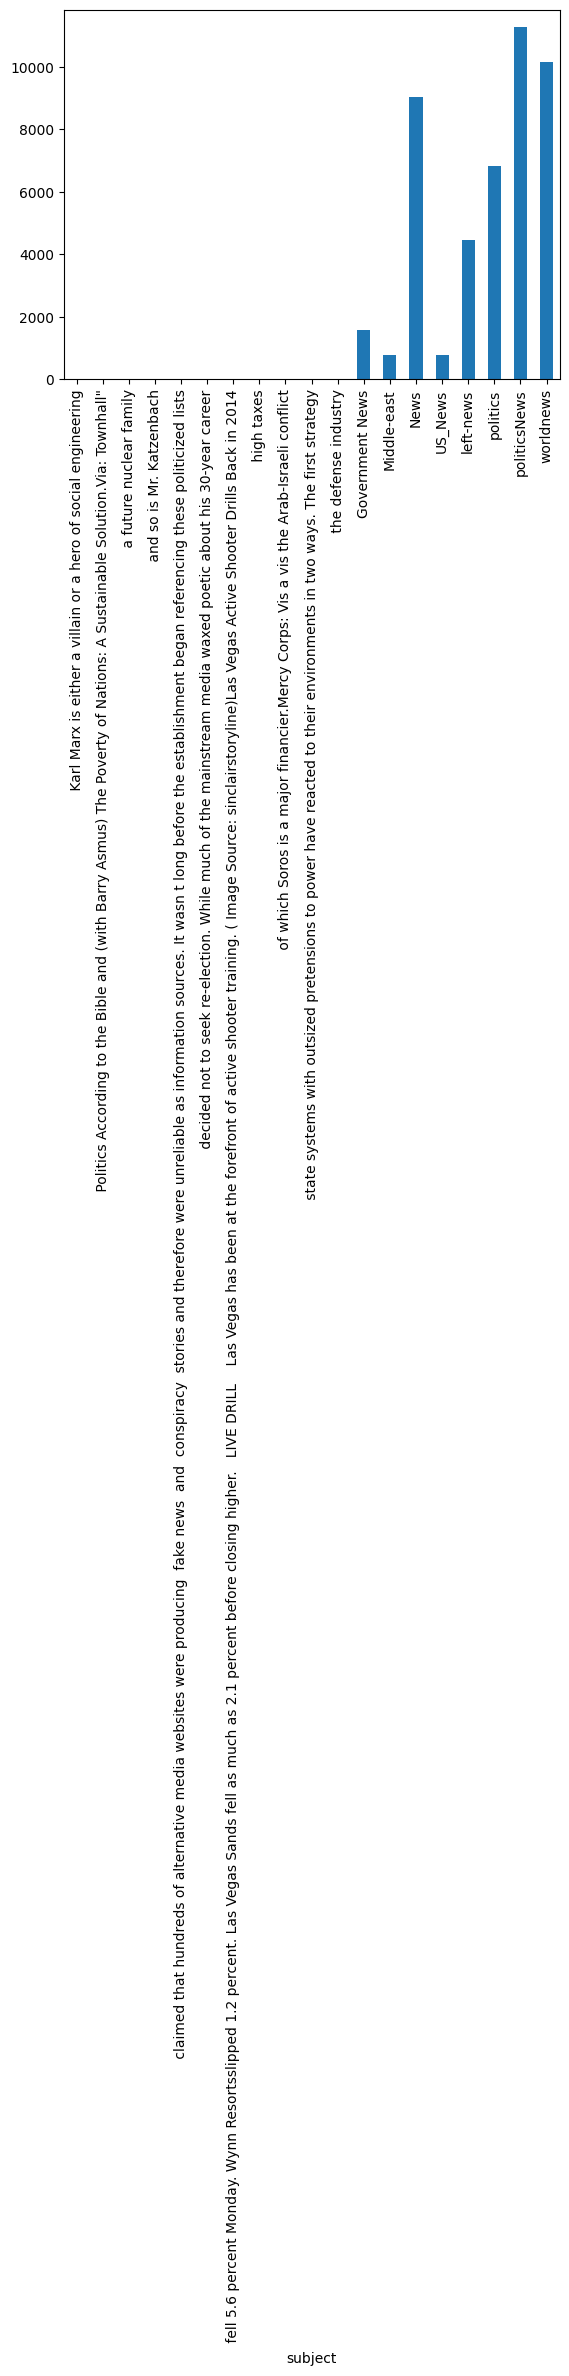

In [14]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23502
true    21417
Name: text, dtype: int64


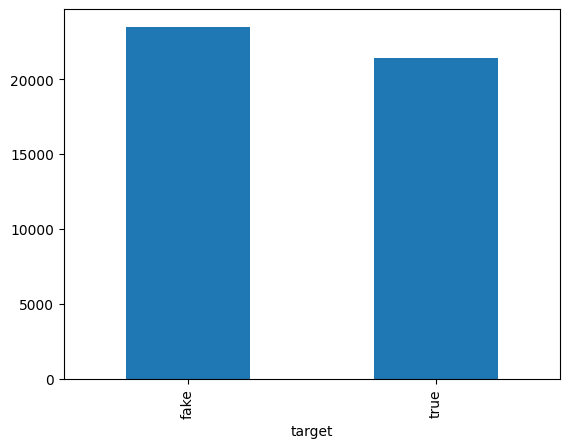

In [15]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [16]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    #print(df_frequency.loc[:,"Word"])
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [17]:
# Function to plot the confusion matrix


from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm,cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
# Split the data
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


In [19]:
x_train.head()

22162    bad news lyin loretta lyin lizzie depending up...
38456    tokyo reuters family members japanese abducted...
27530    washington reuters us presidential candidate b...
15650    instead participating tonight gop debate donal...
7162     harare reuters zimbabwe former vice president ...
Name: text, dtype: object

In [20]:
y_train.head()

22162    fake
38456    true
27530    true
15650    fake
7162     true
Name: target, dtype: object

In [21]:
dct={}

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
xv_train=v.fit_transform(x_train)
xv_test=v.transform(x_test)

In [23]:
# print(y_train)
# temp=y_train
# temp=np.where(temp=="fake",0,1)
# print(temp)
print(xv_test)
print(y_test)

  (0, 198985)	0.017184648584594696
  (0, 198607)	0.04762240656368381
  (0, 198426)	0.029343917336079457
  (0, 197824)	0.07351222687132487
  (0, 196449)	0.03035188325504876
  (0, 195664)	0.027739719500533472
  (0, 193701)	0.08540478760629858
  (0, 191660)	0.03238827440402739
  (0, 188059)	0.0518903227686236
  (0, 187919)	0.06242311165150453
  (0, 186916)	0.02308259306694157
  (0, 185571)	0.042741117040590144
  (0, 180058)	0.027870847091402643
  (0, 176491)	0.039977195434527546
  (0, 176342)	0.0532701052078711
  (0, 174950)	0.0369277090689501
  (0, 173303)	0.08136832314903544
  (0, 171136)	0.04772107021914851
  (0, 171082)	0.06728142002397286
  (0, 168939)	0.04836899890202869
  (0, 168581)	0.03280157244479756
  (0, 165263)	0.040378386549950074
  (0, 165049)	0.0421421358927512
  (0, 164734)	0.05545410085477301
  (0, 162037)	0.08539467706422206
  :	:
  (8983, 32816)	0.13863482452300807
  (8983, 32584)	0.1817361957391524
  (8983, 32572)	0.04909802292695656
  (8983, 32455)	0.1606482887108601

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_features=None)
dt.fit(xv_train,y_train)
# Accuracy
prediction = dt.predict(xv_test)
#print(prediction)
dt_score=dt.score(xv_test,y_test)
print(dt_score)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


0.9956589492430988
accuracy: 99.57%


In [25]:
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

In [26]:
 #decison tree
    
# criterior:gini
# splitter:best
# max_dept:none
# min_sample_split=2
# min_sample_leaf=1
# min_weight_fraction_leaf=0
# max_feautures=none
# ccp_alpha=0

Confusion matrix, without normalization


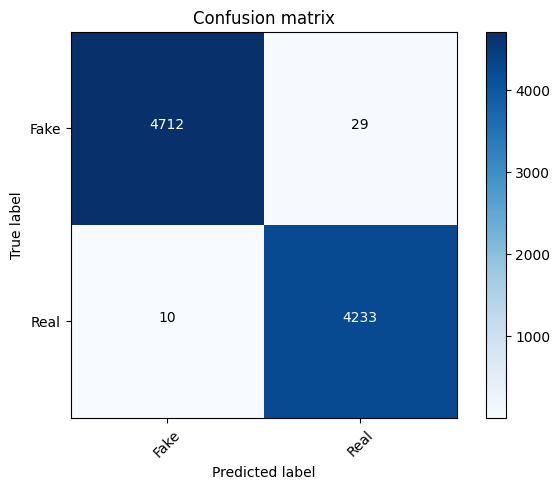

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [28]:
print(y_train)
temp=y_train
temp=np.where(temp=="fake",0,1)
print(temp)


22162    fake
38456    true
27530    true
15650    fake
7162     true
         ... 
11284    true
44732    true
38158    fake
860      fake
15795    fake
Name: target, Length: 35935, dtype: object
[0 1 1 ... 0 0 0]


0.9883125556544969
accuracy: 99.57%
Confusion matrix, without normalization


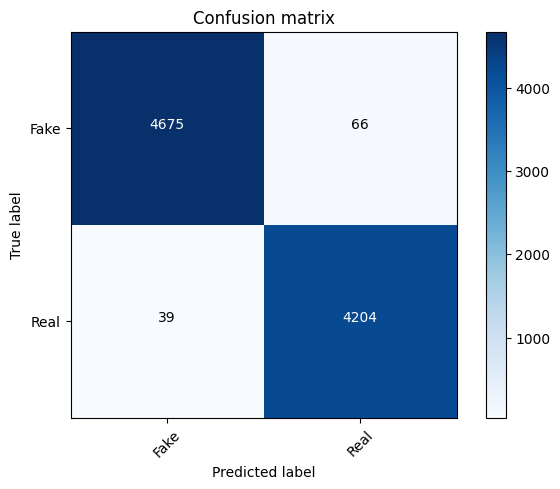

In [29]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(xv_train,y_train)
pred_lr=lr.predict(xv_test)
#print(pred_lr)
lr_score=lr.score(xv_test,y_test)
print(lr_score)
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
#print(classification_report(y_test,pred_lr))

cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [30]:
#logistic regression

# penalty=12
# dual=false
# tol=1e-4
# c=1.0
# fit_intercept=true
# class_weight=none
# random_state=none
# solver=lbfgs

0.9972172751558326
accuracy: 99.72%
Confusion matrix, without normalization


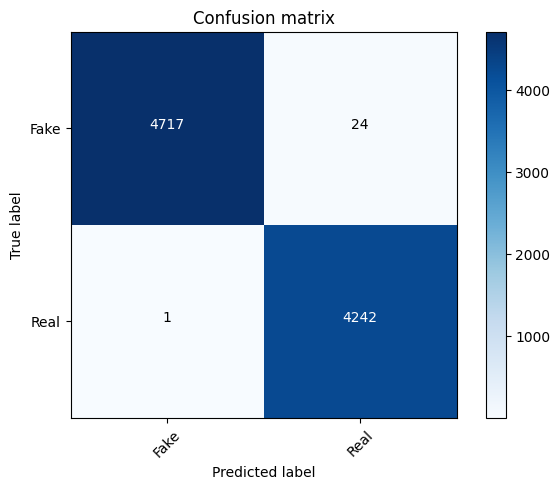

In [31]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# y_train=temp
# np.where(temp=='fake',0,1)
# print(temp)
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(xv_train,temp)
temp2=y_test
temp2=np.where(temp2=="fake",0,1)
my_model_score=my_model.score(xv_test,temp2)
# Predicting the Test set results
y_pred = my_model.predict(xv_test)
print(my_model_score)
dct['XG Boost'] = round(accuracy_score(temp2, y_pred)*100,2)
print("accuracy: {}%".format(round(accuracy_score(temp2, y_pred)*100,2)))

cm = metrics.confusion_matrix(temp2, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [32]:
#xg boost parameters

# eta=0.3
# min_child_weight=1
# silent=0
# booster=gbtree
# max_depth=6
# gammma=0
# max_delta_step=0
# lambda=1
# alpha=0
# scale_pos_weight=1
# objective [default=reg:linear]
# seed=0

0.9968833481745325
accuracy: 99.69%
Confusion matrix, without normalization


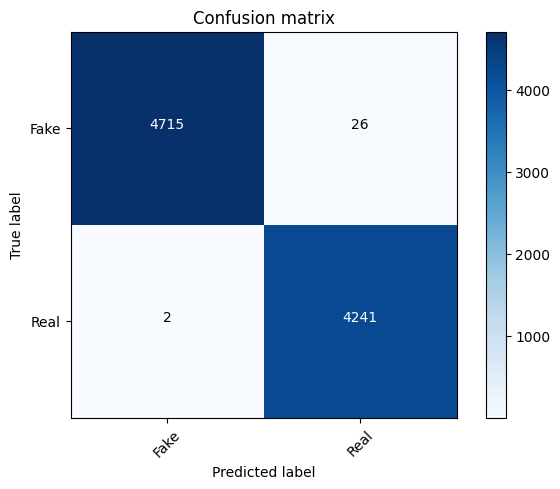

In [35]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

temp=y_train
temp=np.where(temp=="fake",0,1)

rfc = RandomForestClassifier(max_features=None)
rfc.fit(xv_train,temp)
prediction_rfc =rfc.predict(xv_test)
temp2=y_test
temp2=np.where(temp2=="fake",0,1)
rfc_score=rfc.score(xv_test,temp2)
#print(prediction)
print(rfc_score)
print("accuracy: {}%".format(round(accuracy_score(temp2, prediction_rfc)*100,2)))
dct['Random Forest'] = round(accuracy_score(temp2, prediction_rfc)*100,2)

cm = metrics.confusion_matrix(temp2, prediction_rfc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#rfc parameters

#n_estimators=100
# criterior:gini
# max_dept:none
# min_sample_split=2
# min_sample_leaf=1
# min_weight_fraction_leaf=0

#---># max_feautures=sqrt


0.9956589492430988
accuracy: 99.57%
Confusion matrix, without normalization


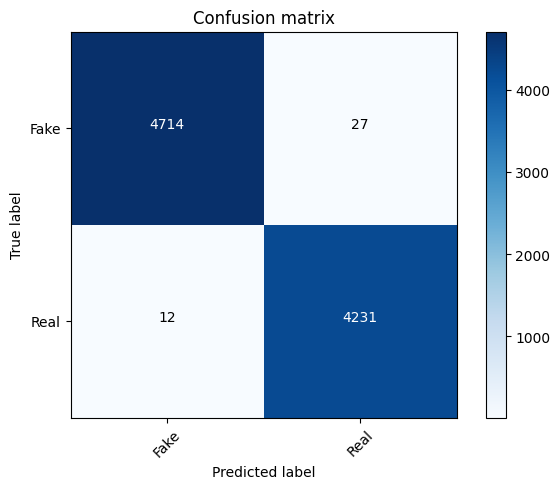

In [37]:
#svm

from sklearn import svm

temp=y_train
temp=np.where(temp=="fake",0,1)

temp2=y_test
temp2=np.where(temp2=="fake",0,1)

sv=svm.SVC(kernel='linear')
sv.fit(xv_train,temp)
prediction_svm=sv.predict(xv_test)
sv_score=sv.score(xv_test,temp2)
print(sv_score)
print("accuracy: {}%".format(round(accuracy_score(temp2, prediction_svm)*100,2)))
dct['SVM'] = round(accuracy_score(temp2, prediction_svm)*100,2)

cm = metrics.confusion_matrix(temp2, prediction_svm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#svm default parameters

# c=1.0
# degree=3
# gamma=scale
# coef0=0
# kernel=rbf
# probability=false
# shrinking=true
# class_weight=none
# randomstate=none

C:\Users\shard\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\shard\AppData\Roaming\Python\Python311\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


<bound method ClassifierMixin.score of MultinomialNB(alpha=0.0)>
accuracy: 97.8%
Confusion matrix, without normalization


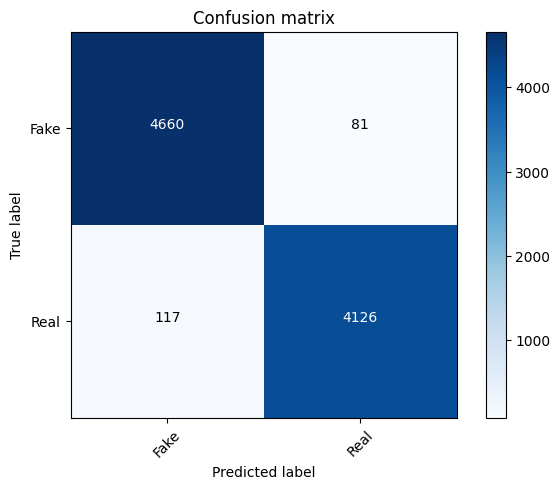

In [38]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

temp=y_train
temp=np.where(temp=="fake",0,1)

nb=MultinomialNB(alpha=0.0)
nb.fit(xv_train,temp)
prediction_nb=nb.predict(xv_test)
#print(prediction_nb)

# print(y_test)
# print(temp)
nb_score=nb.score(xv_test,temp2)
print(nb.score)
print("accuracy: {}%".format(round(accuracy_score(temp2, prediction_nb)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(temp2, prediction_nb)*100,2)

cm = metrics.confusion_matrix(temp2, prediction_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#nb parametrs

# alpha=1.0
# force_alpha=false
# fit_prior=True
# class_prior=None

In [45]:
def fake_news(news):
    news=remove_punct(news)
    input_data=[news]
    ser = pd.Series(input_data)
    ser=ser.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    v_inputdata=v.transform(ser)
    #v_inputdata=v.transform(input_data)
    prediction=lr.predict(v_inputdata)
    if(prediction[0]=="true"):
        print("Using Logisitic Regression : {} ".format("TRUE NEWS"))
    else:
        print("Using Logisitic Regression : {} ".format("FAKE NEWS"))
        
    prediction2=dt.predict(v_inputdata)
    if(prediction2[0]=="true"):
        print("Using Decison Tree Classifier : {} ".format("TRUE NEWS"))
    else:
        print("Using Decison Tree Classifier : {} ".format("FAKE NEWS"))
    
    
    prediction3=my_model.predict(v_inputdata)
    if(prediction3==0):
        print("Using Xgboost : {}".format("FAKE NEWS"))
    else:
        print("Using Xgboost : {}".format("TRUE NEWS"))
   
    
    prediction4=sv.predict(v_inputdata)
    if(prediction4==0):
        print("Using SVM : {}".format("FAKE NEWS"))
    else:
        print("Using SVM : {}".format("TRUE NEWS"))
    
    
    prediction5=nb.predict(v_inputdata)
    if(prediction5==0):
        print("Using Naive Bayes : {}".format("FAKE NEWS"))
    else:
        print("Using Naive Bayes : {}".format("TRUE NEWS"))
    
    
    
    prediction6=rfc.predict(v_inputdata)
    if(prediction6==0):
        print("Using Random Forest : {}".format("FAKE NEWS"))
    else:
        print("Using Random Forest : {}".format("TRUE NEWS"))
   
    
    
    
news=input("Enter news: ")
print(" ")
fake_news(news)

Enter news: In America, we have been having a conversation about police brutality against black Americans. Despite the countless black people murdered unjustly by police, there is usually no justice. Sandra Bland, Philando Castile, Keith Lamont Scott, Michael Brown, Freddie Gray too many to mention here, really. All of those people were senselessly murdered by cops who chose to be their judges, juries, and executioners, and they did so with impunity and without consequence. However, there is hope, and it is coming out of South Carolina, of all places.North Charleston police officer Michael Slager murdered Walter Scott, a black man who was fleeing after a routine traffic stop in cold blood in 2015. He would have gotten away with it, too, had it not been for a citizen who was brave enough to tape the murder. The tape showed that Slager had lied about his life being in danger, and it showed him cuffing Scott s lifeless body, and then planting a taser as  evidence.  Here is the news report

C:\Users\shard\AppData\Local\Temp\ipykernel_11476\3857541561.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


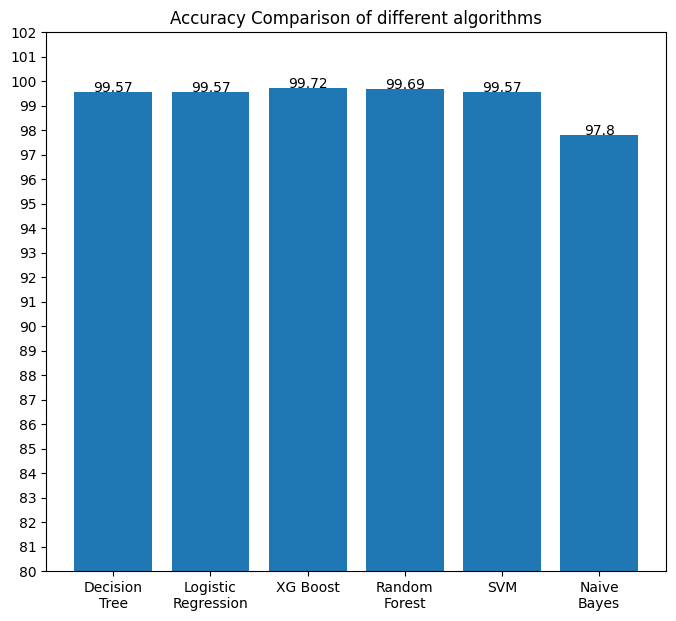

In [42]:
#compare all algos

import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(80,100)
plt.yticks(range(80,103))
ax= plt.subplot()
addlabels(list(dct.keys()),list(dct.values()))
wrap_labels(ax,10)
plt.title("Accuracy Comparison of different algorithms")
plt.show()

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb=GradientBoostingClassifier(random_state=0)
# gb.fit(xv_train,y_train)
# pred_gb=gb.predict(xv_test)
# gb.score(xv_test,y_test)

In [ ]:
# #decison tree
# from sklearn.tree import DecisionTreeClassifier


# dt=DecisionTreeClassifier()
# dt.fit(xv_train,y_train)
# # Accuracy
# prediction = dt.predict(xv_test)
# #print(prediction)
# dt_score=dt.score(xv_test,y_test)
# print(dt_score)
# #print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
# dct['Decision Tree Classifier'] = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', clf)])

# model = pipe.fit(x_train, y_train)
# prediction = model.predict(x_test)
# print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
# dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
# #random forest
# from sklearn.ensemble import RandomForestClassifier

# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

# model = pipe.fit(x_train, y_train)
# prediction = model.predict(x_test)
# print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
# dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

